# Fitting Resnet32 and Resnet 50 on DHCD (Devanagari) Dataset

Training Resnet32 and Resnet50 models using the fastai library on the [DHCD (Devanagari) Dataset](https://archive.ics.uci.edu/ml/datasets/Devanagari+Handwritten+Character+Dataset) 

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

### Importing fastai library

In [2]:
from fastai import *
from fastai.vision import *

### Creating ImageDataBunch from the dataset

In [3]:
path = Path('/Users/aviagarwal/Documents/Programming/devanagari-classifier/Dataset/')
path.ls()

[PosixPath('/Users/aviagarwal/Documents/Programming/devanagari-classifier/Dataset/.DS_Store'),
 PosixPath('/Users/aviagarwal/Documents/Programming/devanagari-classifier/Dataset/Test'),
 PosixPath('/Users/aviagarwal/Documents/Programming/devanagari-classifier/Dataset/models'),
 PosixPath('/Users/aviagarwal/Documents/Programming/devanagari-classifier/Dataset/Train')]

In [4]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path=path, train='Train', test='Test', ds_tfms=tfms)

/Users/aviagarwal/anaconda3/envs/fastai/lib/python3.7/site-packages/fastai/data_block.py:402: UserWarning: Your validation set is empty. Is this is by design, use `no_split()` 
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")


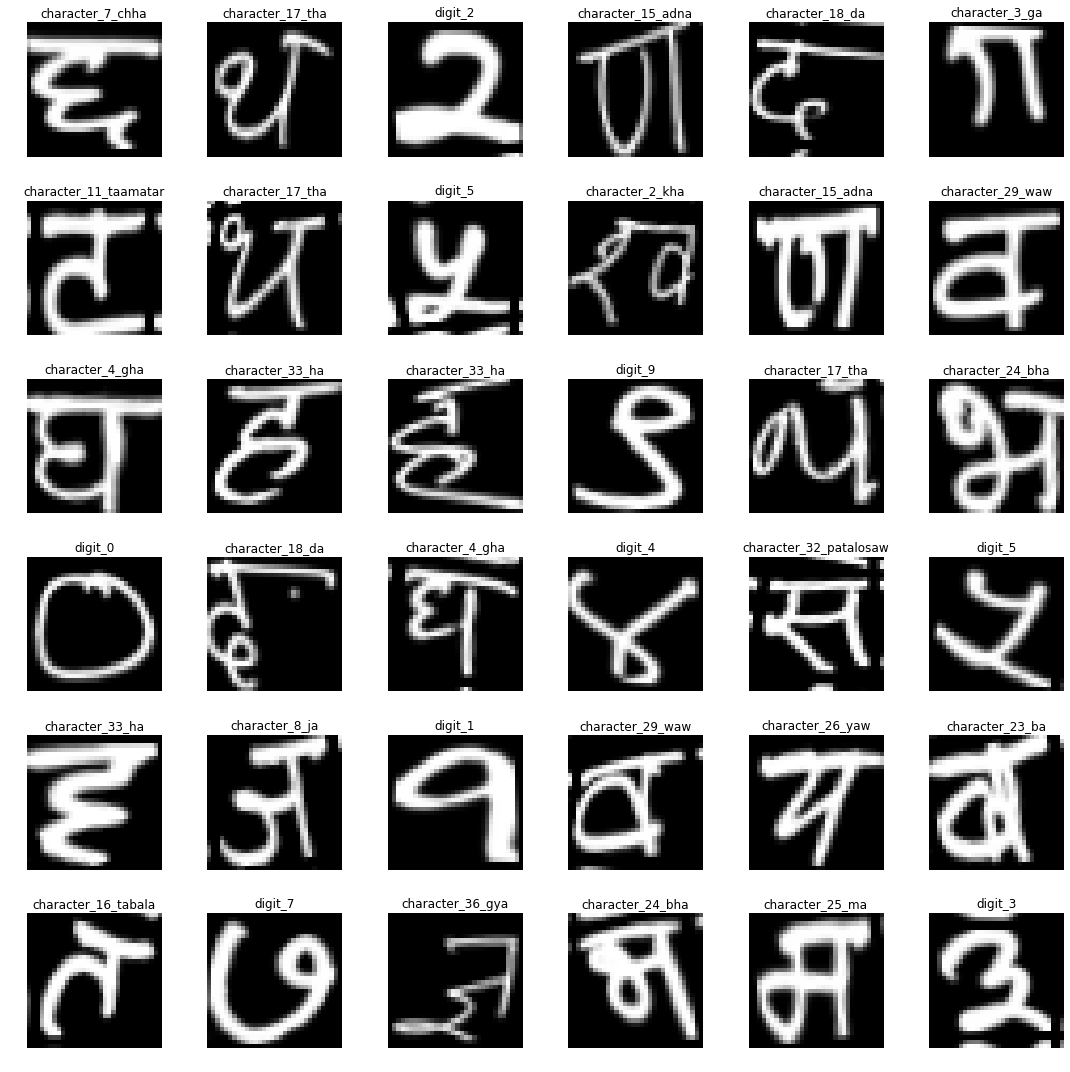

In [5]:
data.show_batch(rows=6, figsize=(15,15))

### Verifying the number of classes

In [6]:
print(data.classes)
len(data.classes)

['character_10_yna', 'character_11_taamatar', 'character_12_thaa', 'character_13_daa', 'character_14_dhaa', 'character_15_adna', 'character_16_tabala', 'character_17_tha', 'character_18_da', 'character_19_dha', 'character_1_ka', 'character_20_na', 'character_21_pa', 'character_22_pha', 'character_23_ba', 'character_24_bha', 'character_25_ma', 'character_26_yaw', 'character_27_ra', 'character_28_la', 'character_29_waw', 'character_2_kha', 'character_30_motosaw', 'character_31_petchiryakha', 'character_32_patalosaw', 'character_33_ha', 'character_34_chhya', 'character_35_tra', 'character_36_gya', 'character_3_ga', 'character_4_gha', 'character_5_kna', 'character_6_cha', 'character_7_chha', 'character_8_ja', 'character_9_jha', 'digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']


46

### Verifying the number of files in Train, Test and Validation sets

In [7]:
data

ImageDataBunch;

Train: LabelList
y: CategoryList (78200 items)
[Category character_29_waw, Category character_29_waw, Category character_29_waw, Category character_29_waw, Category character_29_waw]...
Path: /Users/aviagarwal/Documents/Programming/devanagari-classifier/Dataset
x: ImageItemList (78200 items)
[Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32)]...
Path: /Users/aviagarwal/Documents/Programming/devanagari-classifier/Dataset;

Valid: LabelList
y: CategoryList (0 items)
[]...
Path: /Users/aviagarwal/Documents/Programming/devanagari-classifier/Dataset
x: ImageItemList (0 items)
[]...
Path: /Users/aviagarwal/Documents/Programming/devanagari-classifier/Dataset;

Test: LabelList
y: EmptyLabelList (13800 items)
[EmptyLabel , EmptyLabel , EmptyLabel , EmptyLabel , EmptyLabel ]...
Path: .
x: ImageItemList (13800 items)
[Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32)]...
Path: /Users/aviagarwa

The dataset has no Validation set. So, I attempt to create a validation dataset.

In [8]:
data = ImageDataBunch.from_folder(path=path, train='Train', test='Test', valid_pct=0.2, ds_tfms=tfms)

In [9]:
data

ImageDataBunch;

Train: LabelList
y: CategoryList (73600 items)
[Category character_29_waw, Category character_29_waw, Category character_29_waw, Category character_29_waw, Category character_29_waw]...
Path: /Users/aviagarwal/Documents/Programming/devanagari-classifier/Dataset
x: ImageItemList (73600 items)
[Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32)]...
Path: /Users/aviagarwal/Documents/Programming/devanagari-classifier/Dataset;

Valid: LabelList
y: CategoryList (18400 items)
[Category character_23_ba, Category digit_9, Category character_10_yna, Category digit_5, Category character_3_ga]...
Path: /Users/aviagarwal/Documents/Programming/devanagari-classifier/Dataset
x: ImageItemList (18400 items)
[Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32)]...
Path: /Users/aviagarwal/Documents/Programming/devanagari-classifier/Dataset;

Test: LabelList
y: EmptyLabelList (13800 items)
[EmptyLabel , Em

### Training Resnet34

In [42]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /Users/aviagarwal/.torch/models/resnet34-333f7ec4.pth
87306240it [00:16, 5334021.87it/s]


In [ ]:
learn.fit_one_cycle(4)

In [ ]:
learn.save('stage-1-34')